<a href="https://colab.research.google.com/github/Junseokee/Study-Python/blob/main/220803_%EB%8C%80%EC%B6%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 불러오기

- 0 ID                 아이디
- 1   Age             나이
- 2   Experience    직장 근속연수
- 3   Income        연봉
- 4   ZIP Code      우편번호
- 5   Family         가구원수
- 6   CCAvg          월 평균 신용카드 사용액
- 7   Education      학력
- 8   Mortgage       주택담보대출의 가치
- 9   Personal Loan  개인 대출 수락 참여여부
- 10  Securities Account 증권계좌 유무
- 11  CD Account       예금 증명서 계좌 유무
- 12  Online              인터넷뱅킹 사용유무
- 13  CreditCard    다른은행 은행신용카드 사용유무

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#os.environ을 이용하여 Kaggle API 세팅
os.environ['KAGGLE_USERNAME'] = 'junseokee'
os.environ['KAGGLE_KEY'] = '700d85d8d7f11484367ea21d45aa2bee'

In [3]:
# 데이터 다운로드 하는 명령
!kaggle datasets download -d teertha/personal-loan-modeling

personal-loan-modeling.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip '*.zip' -d/content

Archive:  personal-loan-modeling.zip
replace /content/Bank_Personal_Loan_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [5]:
#파일 불러오고 난 이후에 head, info, describe는 기본적으로 수행
df = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### EDA

In [8]:
df['Personal Loan'] = df['Personal Loan'].map({0:'No',1:'Yes'}) # map = dataframe에 전부 한번씩 접근을 한다.

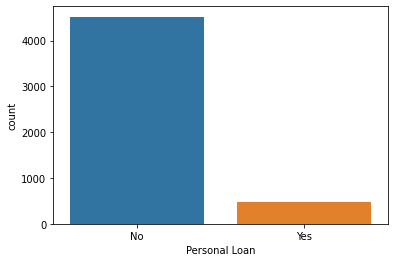

In [9]:
sns.countplot(x='Personal Loan', data = df) # category형 변수는 countplot으로 시각화하면 인사이트를 얻을 수 있다.

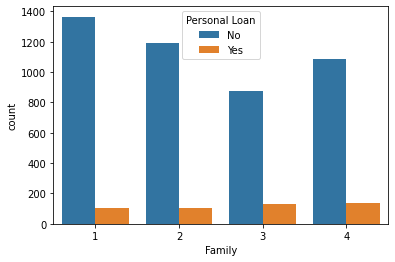

In [10]:
sns.countplot(x='Family', data = df,
              hue='Personal Loan')

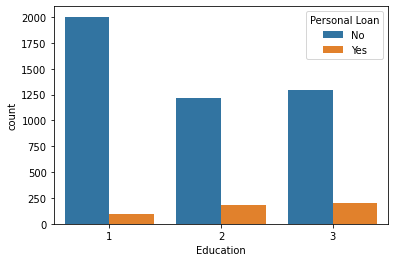

In [11]:
sns.countplot(x='Education', data = df,
              hue='Personal Loan')

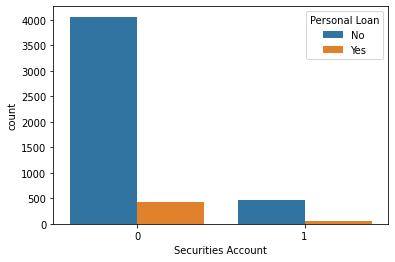

In [12]:
sns.countplot(x='Securities Account', data = df,
              hue='Personal Loan')

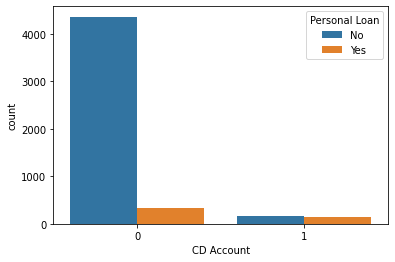

In [13]:
sns.countplot(x='CD Account', data = df,
              hue='Personal Loan')

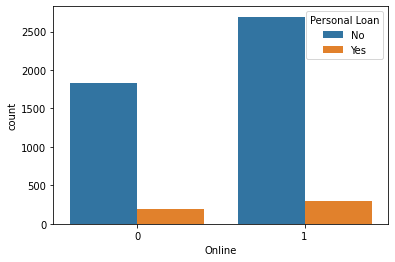

In [14]:
sns.countplot(x='Online', data = df,
              hue='Personal Loan')

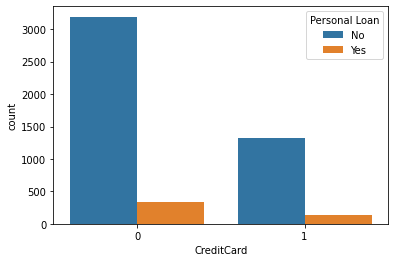

In [15]:
sns.countplot(x='CreditCard', data = df,
              hue='Personal Loan')

In [16]:
df.groupby(['Education']).mean()['Income']

Education
1    85.586355
2    64.313614
3    66.122585
Name: Income, dtype: float64

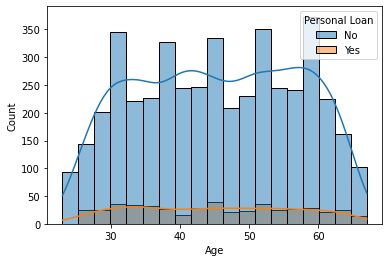

In [17]:
sns.histplot(x='Age', data=df, hue='Personal Loan', # 히스토그램과 커널 밀도함수를 함께 표시
             kde = 'True')

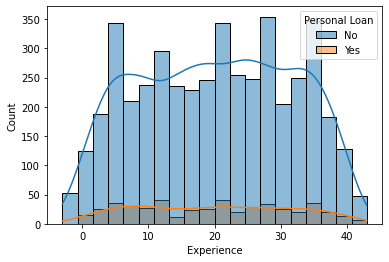

In [18]:
sns.histplot(x='Experience', data=df, hue='Personal Loan',
             kde = 'True')

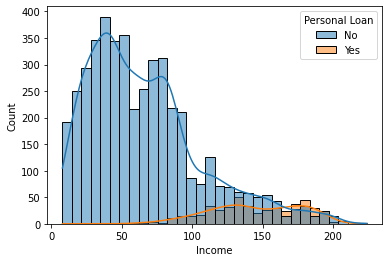

In [19]:
sns.histplot(x='Income', data=df, hue='Personal Loan',
             kde = 'True')

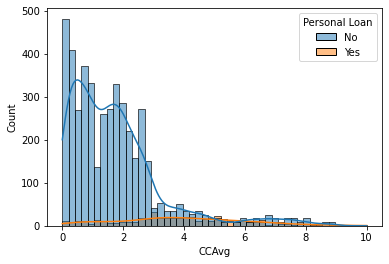

In [20]:
sns.histplot(x='CCAvg', data=df, hue='Personal Loan',
             kde = 'True')

In [21]:
print(df['CCAvg'].quantile(0.95))
print(df['CCAvg'].quantile(0.05))

6.0
0.1


In [23]:
CC1 = df['CCAvg'].quantile(0.95)
CC2 = df['CCAvg'].quantile(0.05)

df = df[(CC1 > df['CCAvg']) & (df['CCAvg'] > CC2)] 

In [24]:
print(df['CCAvg'])

0       1.6
1       1.5
2       1.0
3       2.7
4       1.0
       ... 
4995    1.9
4996    0.4
4997    0.3
4998    0.5
4999    0.8
Name: CCAvg, Length: 4444, dtype: float64


In [25]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,No,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,No,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,No,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,No,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,No,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,No,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,No,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,No,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,No,0,0,1,0


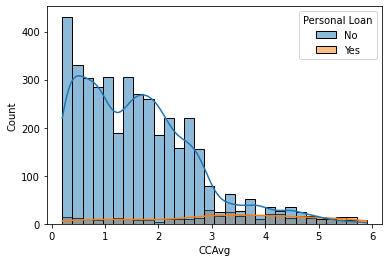

In [26]:
sns.histplot(x='CCAvg', data=df, hue='Personal Loan',
             kde = 'True')

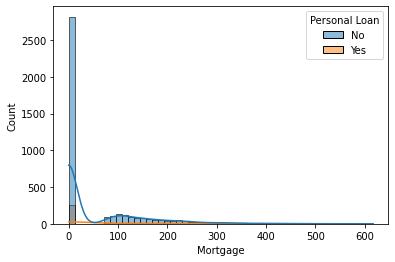

In [27]:
sns.histplot(x='Mortgage', data=df, hue='Personal Loan',
             kde = 'True')

In [28]:
Mor1 = df['Mortgage'].quantile(0.95)
df = df[(df['Mortgage']< Mor1)]

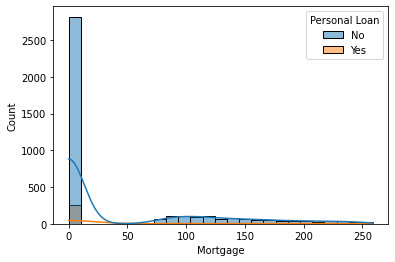

In [29]:
sns.histplot(x='Mortgage', data=df, hue='Personal Loan',
             kde = 'True')

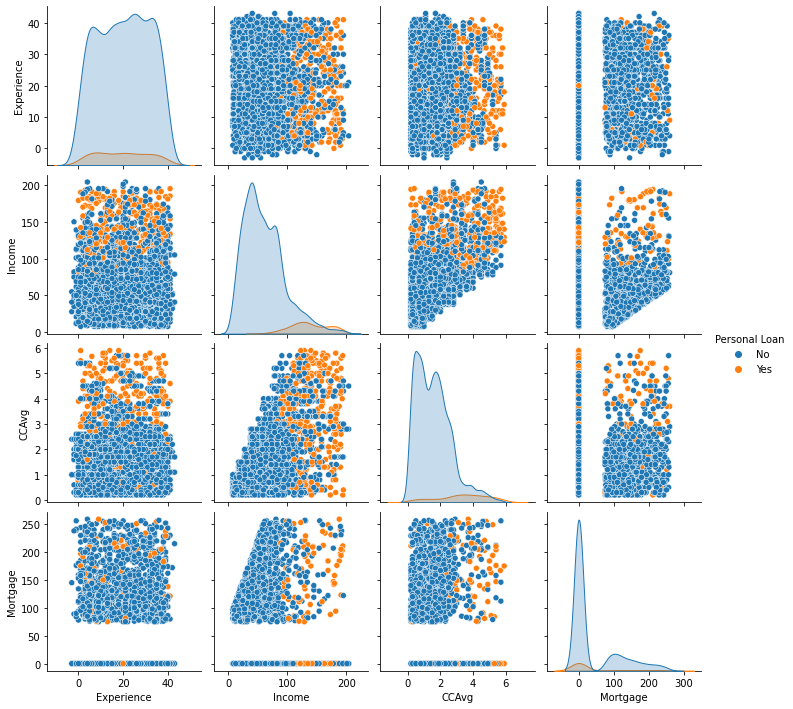

In [30]:
sns.pairplot(df, x_vars = ['Experience', 'Income','CCAvg','Mortgage'], # 칼럼간의 상관도 확인
              y_vars =['Experience', 'Income','CCAvg','Mortgage'],hue = 'Personal Loan')

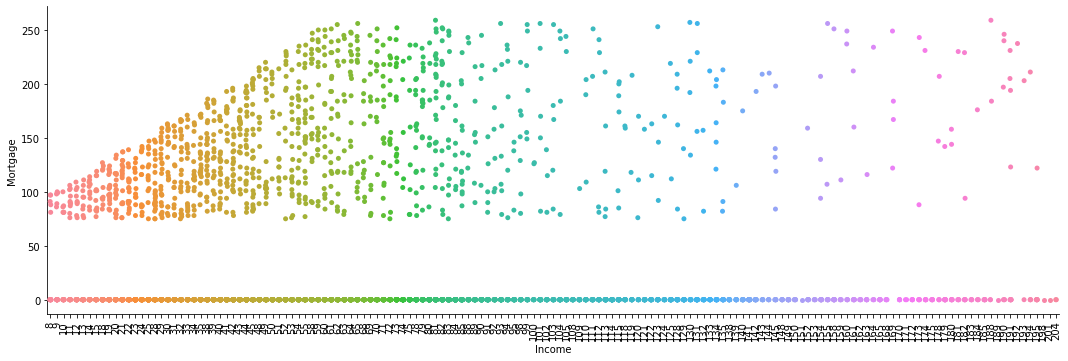

In [31]:
sns.catplot(x='Income', y='Mortgage', data=df, aspect=3) #너비를 인치단위
plt.xticks(rotation=90) # x레이블 90도회전
plt.show()

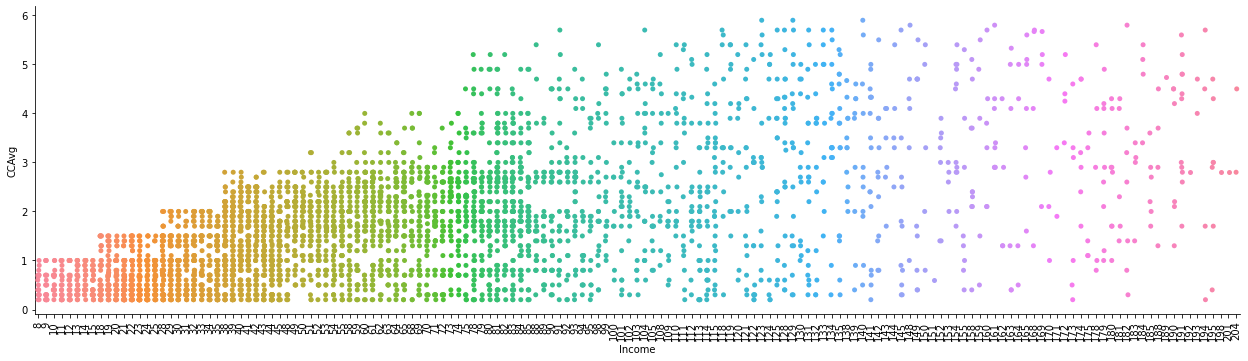

In [32]:
sns.catplot(x='Income', y='CCAvg', data=df, aspect=3.5) #너비를 인치단위
plt.xticks(rotation=90) # x레이블 90도회전
plt.show()

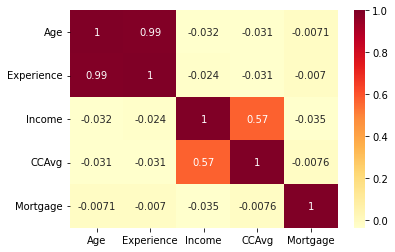

In [33]:
sns.heatmap(df[['Age','Experience','Income','CCAvg','Mortgage']].corr(), # 상관계수가 서로 너무 높으면 좋지않음 -> 가중치가 높게 설정됨 -> 다중 공산성
            annot=True, cmap = 'YlOrRd')

### 전처리

In [34]:
dict(No = 0, Yes = 1)

{'No': 0, 'Yes': 1}

In [35]:
df['Personal Loan'] = df['Personal Loan'].map({'No':0, 'Yes':1})
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [36]:
df.drop(['ID','ZIP Code', 'Experience'], axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


#### get_dummies()를 이용하여 범주형 데이터 전처리하기
  - 이진 분류는 원핫인코딩 안해도됨

In [38]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [39]:
X_cat = df['Education']
X_cat = pd.get_dummies(X_cat, prefix = 'Education')
X_cat.head()

,Education_1,Education_2,Education_3
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


### StanardScaler를 이용해 수치형 데이터 표준화하기
  - StandardScaler를 사용하는 이유
    - 회귀모델과 SVM 모델은 데이터가 정규분포를 따른다는 가정하에 가능한 모델

In [40]:
from sklearn.preprocessing import StandardScaler # 정규화

scaler = StandardScaler()
X_num = df[['Age','Income','Family','CCAvg','Mortgage']]
X_scaled = scaler.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns) # 병합을 쉽게하기위해 데이터프레임으로 변경
X_scaled.head()

,Age,Income,Family,CCAvg,Mortgage
0,-1.776899,-0.443698,1.342131,-0.094657,-0.56668
1,-0.035003,-0.815310,0.480979,-0.177246,-0.56668
2,-0.557572,-1.385116,-1.241323,-0.590192,-0.56668
3,-0.905951,0.819784,-1.241323,0.813825,-0.56668
4,-0.905951,-0.542795,1.342131,-0.590192,-0.56668


### 학습데이터와 테스트데이터 분리

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
cat_lst = ['Securities Account','CD Account',	'Online',	'CreditCard']
X = pd.concat([X_scaled, X_cat, df[cat_lst]],axis=1)
y = df['Personal Loan']

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4220 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4220 non-null   float64
 1   Income              4220 non-null   float64
 2   Family              4220 non-null   float64
 3   CCAvg               4220 non-null   float64
 4   Mortgage            4220 non-null   float64
 5   Education_1         4220 non-null   uint8  
 6   Education_2         4220 non-null   uint8  
 7   Education_3         4220 non-null   uint8  
 8   Securities Account  4220 non-null   int64  
 9   CD Account          4220 non-null   int64  
 10  Online              4220 non-null   int64  
 11  CreditCard          4220 non-null   int64  
dtypes: float64(5), int64(4), uint8(3)
memory usage: 471.1 KB


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1)

In [45]:
print(X_train.shape)
print(X_test.shape)

(2954, 12)
(1266, 12)


## Classification

#### Logisitic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model_lr = LogisticRegression(max_iter = 1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### LogisticRegression 모델 학습결과 **평가하기**

In [62]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
pred = model_lr.predict(X_test)
lr_matrix = metrics.confusion_matrix(y_test, pred)
lr_matrix

array([[1154,    9],
       [  33,   70]])

In [63]:
from sklearn.metrics import classification_report

In [64]:
# Predict를 수행하고 classification_report() 결과 출력하기
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1163
           1       0.89      0.68      0.77       103

    accuracy                           0.97      1266
   macro avg       0.93      0.84      0.88      1266
weighted avg       0.97      0.97      0.96      1266



 #### Support Vector Merchine 모델 생성 학습

In [65]:
from sklearn import svm

In [66]:
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

#### SVM 모델 평가

In [67]:
svm_pred = svm.predict(X_test)

In [68]:
svm_matrix = metrics.confusion_matrix(y_test, svm_pred)
svm_matrix

array([[1162,    1],
       [  24,   79]])

In [69]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1163
           1       0.99      0.77      0.86       103

    accuracy                           0.98      1266
   macro avg       0.98      0.88      0.93      1266
weighted avg       0.98      0.98      0.98      1266



#### KNeighbors Classifier 모델 학습 /평가 하기

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
k_lst = list(range(1,12,2))
#모델 생성 학습
for k in k_lst:
  print('**************************k={}*************************************'.format(k))
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  knn_matrix = metrics.confusion_matrix(y_test, pred)
  print(knn_matrix)
  print(classification_report(y_test, pred))

**************************k=1*************************************
[[1150   13]
 [  33   70]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1163
           1       0.84      0.68      0.75       103

    accuracy                           0.96      1266
   macro avg       0.91      0.83      0.87      1266
weighted avg       0.96      0.96      0.96      1266

**************************k=3*************************************
[[1162    1]
 [  38   65]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1163
           1       0.98      0.63      0.77       103

    accuracy                           0.97      1266
   macro avg       0.98      0.82      0.88      1266
weighted avg       0.97      0.97      0.97      1266

**************************k=5*************************************
[[1163    0]
 [  42   61]]
              precision    recall  f1-score   support

         

#### Decision Tree 모델 학습 평가 하기

In [73]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state = 156) 

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
dt_clf_matrix = metrics.confusion_matrix(y_test, pred)
print(dt_clf_matrix)
print(classification_report(y_test, pred))

[[1157    6]
 [  12   91]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1163
           1       0.94      0.88      0.91       103

    accuracy                           0.99      1266
   macro avg       0.96      0.94      0.95      1266
weighted avg       0.99      0.99      0.99      1266



Feature importances:
[0.045 0.313 0.127 0.105 0.006 0.34  0.027 0.013 0.    0.009 0.012 0.004]
Age : 0.045
Income : 0.313
Family : 0.127
CCAvg : 0.105
Mortgage : 0.006
Education_1 : 0.340
Education_2 : 0.027
Education_3 : 0.013
Securities Account : 0.000
CD Account : 0.009
Online : 0.012
CreditCard : 0.004


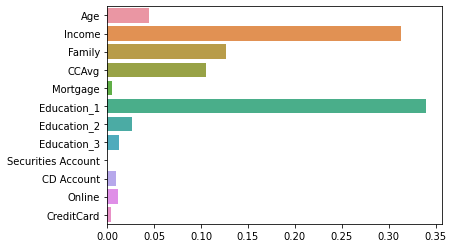

In [75]:
# feature importance 추출 <- 특성별 중요도를 출력
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

# feature별 umportance 매핑
for name, value in zip(X.columns, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=X.columns)

##### 최적의 의사결정 트리 찾기

In [77]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

dtree = DecisionTreeClassifier()

### parameter 들을 dict형태로 설정 -> 횟수 설정
parameters = {'max_depth':[1,2,3,4,5], 'min_samples_split':[2,3,4,5,6]}
# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold로 나누어서 테스트 수행
## refit=True가 defult임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)

grid_dtree.fit(X_train, y_train)

#GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score',
           'rank_test_score', 'split0_test_score',
           'split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.924509,21,0.924873,0.923858,0.924797
1,"{'max_depth': 1, 'min_samples_split': 3}",0.924509,21,0.924873,0.923858,0.924797
2,"{'max_depth': 1, 'min_samples_split': 4}",0.924509,21,0.924873,0.923858,0.924797
3,"{'max_depth': 1, 'min_samples_split': 5}",0.924509,21,0.924873,0.923858,0.924797
4,"{'max_depth': 1, 'min_samples_split': 6}",0.924509,21,0.924873,0.923858,0.924797
5,"{'max_depth': 2, 'min_samples_split': 2}",0.966824,16,0.967513,0.967513,0.965447
6,"{'max_depth': 2, 'min_samples_split': 3}",0.966824,16,0.967513,0.967513,0.965447
7,"{'max_depth': 2, 'min_samples_split': 4}",0.966824,16,0.967513,0.967513,0.965447
8,"{'max_depth': 2, 'min_samples_split': 5}",0.966824,16,0.967513,0.967513,0.965447
9,"{'max_depth': 2, 'min_samples_split': 6}",0.966824,16,0.967513,0.967513,0.965447


In [81]:
# 최적의 의사결정 트리 출력
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
estimator_matrix = metrics.confusion_matrix(y_test, pred)
print(estimator_matrix)
print(classification_report(y_test, pred))

[[1163    0]
 [  24   79]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1163
           1       1.00      0.77      0.87       103

    accuracy                           0.98      1266
   macro avg       0.99      0.88      0.93      1266
weighted avg       0.98      0.98      0.98      1266



In [82]:
# 최적의 의사결정 트리 시각화
from sklearn.tree import export_graphviz
# export_grathviz의 호출 결과로 out_file로 저장된 tree.dot 파일을 생성함.
export_graphviz(estimator, out_file= "best_tree.dot",
                class_names = ['0','1'], 
                feature_names = X.columns,
                impurity = True,
                filled = True)

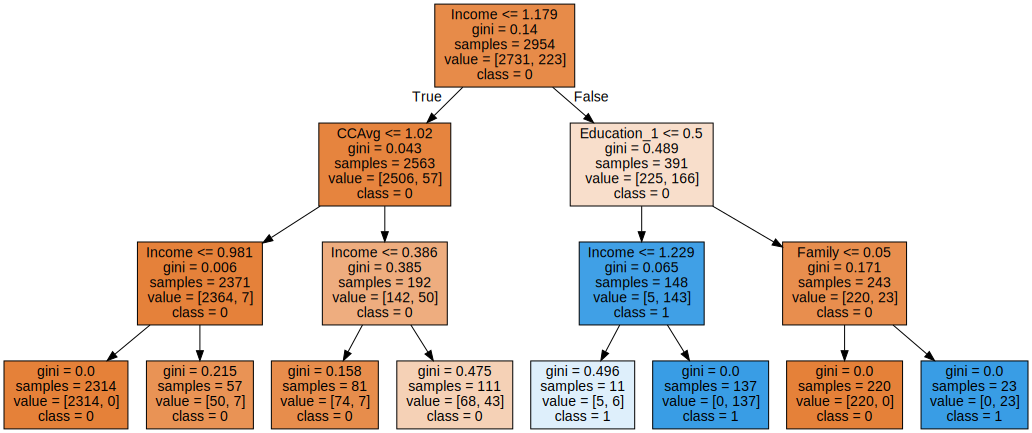

In [83]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz로 읽어서 Jupyter Notebook 상에서 시각화
with open('best_tree.dot') as f: 
  dot_graph = f.read()
graphviz.Source(dot_graph)

#### 데이터 불균형 문제

In [84]:
test_pred = np.zeros(len(X_test)) # 전부 0으로만 해도 틀리는 값이 많다 -> 데이터가 0에 쏠려서 나타나는 현상
test_matrix = metrics.confusion_matrix(y_test, test_pred)
print(test_matrix)
print(classification_report(y_test, test_pred))

[[1163    0]
 [ 103    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1163
           1       0.00      0.00      0.00       103

    accuracy                           0.92      1266
   macro avg       0.46      0.50      0.48      1266
weighted avg       0.84      0.92      0.88      1266



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
